# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import os 
from tqdm import tqdm
from pydub import AudioSegment
import os
os.environ["PATH"] += os.pathsep + 'C:/Path_Programs'
#importing libraries
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from os import path

# Importing Data

In [2]:
df=pd.read_csv('list3.csv')

In [3]:
df

,Unnamed: 0,File,Language
0,0,171.mp3,Bengali
1,1,172.mp3,Bengali
2,2,173.mp3,Bengali
3,3,174.mp3,Bengali
4,4,175.mp3,Bengali
...,...,...,...
300,26,856.mp3,Telugu
301,27,862.mp3,Telugu
302,28,866.mp3,Telugu
303,29,908.mp3,Telugu


# Testing methodology on Sample data

In [4]:
audio_file_path='./Data/test2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

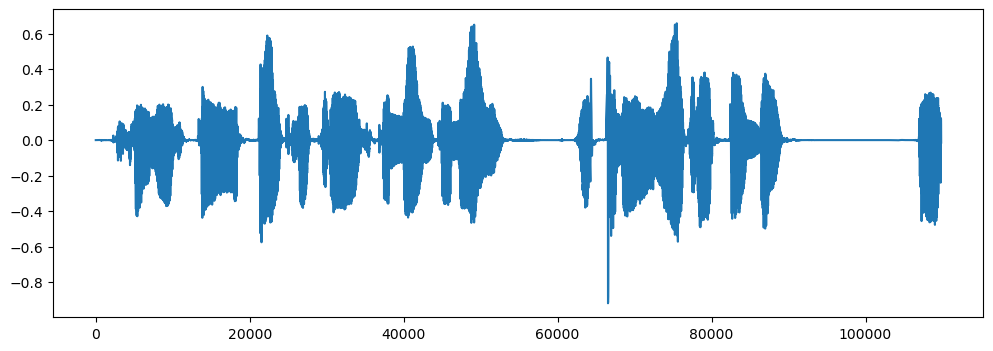

In [5]:
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [6]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 215)


In [7]:
mfccs

array([[-5.6850085e+02, -5.5690466e+02, -5.5513818e+02, ...,
        -2.5008333e+02, -2.1062082e+02, -2.1906342e+02],
       [ 1.9980186e+00,  1.7122528e+01,  1.9581072e+01, ...,
         1.5924387e+01,  7.1315331e+01,  1.3388142e+02],
       [ 1.6096959e+00,  1.4560986e+01,  1.6655224e+01, ...,
         1.8111155e+01, -1.3984650e+01, -1.2154413e+01],
       ...,
       [ 1.3021111e+00,  2.8575447e+00,  2.8730744e-01, ...,
        -5.0913720e+00, -4.5364079e+00, -1.1278815e+00],
       [ 8.4706783e-01,  2.4661732e+00, -1.0936581e-01, ...,
         4.1762967e+00, -2.9138362e+00, -7.8561991e-01],
       [ 2.9882935e-01,  1.1142788e+00, -1.0312804e+00, ...,
         1.3013973e+01,  7.9092741e-01, -2.7169523e+00]], dtype=float32)

# Feauture extraction

In [8]:
MFCC_NUM = 20 # 20 mfcc's will be calculated for each frame of the audio signal
MFCC_MAX_LEN = 2000 #maximum length of feature vectors (padding, and truncating)

In [9]:
def features_extractor(file,lang,max_len=2000):
    src = "./Data/Train/"+lang+"1/"+file
    dst = "./Data/test2.wav"
    sound = AudioSegment.from_mp3(src) #we read the audio file using pydub library
    sound.export(dst, format="wav")
    audio, sample_rate = librosa.load(dst, mono=True,sr=44100) 
    audio=audio[::3] #speeds up data processing
    mfcc = librosa.feature.mfcc(y = audio,sr=44100, n_mfcc=20)
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    
    # Else cutoff the remaining parts
    
    else:
        mfcc = mfcc[:, :max_len]
    
    return mfcc

In [10]:
extracted_features=[] #empty list to store extracted features and language labels
for index_num,row in tqdm(df.iterrows()): #iterates through rows of df
    file_Name = str(row["File"])
    class_labels=row["Language"]
    data=features_extractor(file_Name,class_labels)
    extracted_features.append([data,class_labels])

305it [00:36,  8.44it/s]


In [11]:
extracted_features[:3]

[[array([[-5.2946625e+02, -4.5446738e+02, -3.9308878e+02, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 4.8457233e+01,  9.5342575e+01,  1.5136635e+02, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 2.8190834e+01,  2.5879881e+01,  3.9971344e+01, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         ...,
         [-1.0993437e+01, -5.0499296e+00,  7.1224375e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [-6.9087219e+00,  9.1962814e-02,  7.1970024e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [-5.3697634e+00, -3.7932420e-01,  9.5489740e-01, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32),
  'Bengali'],
 [array([[-5.4273145e+02, -4.4655005e+02, -2.6354449e+02, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 8.5125893e+01,  1.2557796e+02,  1.1585376e+02, ...,
           0.0000000e+00,  0.0000000e+

In [12]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['Vectors','Lang'])
extracted_features_df.head(5) 

,Vectors,Lang
0,"[[-529.46625, -454.46738, -393.08878, -297.311...",Bengali
1,"[[-542.73145, -446.55005, -263.5445, -161.7895...",Bengali
2,"[[-580.6701, -480.8971, -398.3205, -236.64789,...",Bengali
3,"[[-423.3275, -332.37094, -332.72223, -315.9054...",Bengali
4,"[[-247.7952, -113.57214, -67.81812, -92.65014,...",Bengali


In [13]:
extracted_features_df.to_csv('extract.csv')

In [14]:
shuffled = extracted_features_df.sample(frac=1)
print(shuffled) # ensures randomization before splitting into training and testing sets

                                               Vectors      Lang
183  [[-545.7878, -433.51703, -356.90253, -320.0292...      Urdu
256  [[-366.3032, -239.98183, -185.54884, -166.5596...   Marathi
20   [[-528.76117, -452.0688, -415.1206, -415.4161,...   Bengali
3    [[-423.3275, -332.37094, -332.72223, -315.9054...   Bengali
267  [[-233.02737, -118.366455, -113.114815, -150.5...   Marathi
..                                                 ...       ...
5    [[-492.54364, -371.88412, -327.3182, -318.1049...   Bengali
33   [[-290.89963, -167.47049, -154.24762, -192.142...  Gujrathi
93   [[-245.61218, -113.57858, -81.45341, -100.0937...     Hindi
178  [[-501.39587, -412.85544, -302.69095, -251.694...      Urdu
254  [[-473.8204, -340.9154, -293.85962, -286.965, ...   Marathi

[305 rows x 2 columns]


In [15]:
#split into independent and dependent variables
X=np.array(shuffled['Vectors'].tolist())
y=np.array(shuffled['Lang'].tolist())

In [16]:
X.dtype

dtype('float32')

In [17]:
#Label encoding converting categorical labels into a binary matrix(one-hot encoding)
from tensorflow.keras.utils import to_categorical #converts vectors into binary matrix
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
y #now contains the labels in a one-hot encoded format suitable for training neural network

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
# TRAIN TEST SPLIT


import tensorflow
import keras
import tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #20% FOR TESTING AND 80% FOR TRAINING
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2) # TRAINING SET IS FURTHER SPLITS INTO TRAINING AND VALIDATION SETSS

In [21]:
X_train.shape #no of rows, mfcc, max length

(195, 20, 2000)

# Reshaping data

In [22]:
feature_dim_1 = MFCC_NUM #20
feature_dim_2 = MFCC_MAX_LEN #2000
channel = 1 #mono audio
epochs = 70
batch_size = 100
verbose = 1 #we'll see a progress bar for each epoch
num_classes = 10

In [23]:
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel) #batch_size, height, width, channels
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)


In [24]:
X_train.shape

(195, 20, 2000, 1)

# Building Model

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import optimizers

In [26]:
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu')) #48 neurons
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25)) #randomly sets a fraction of input units to 0, to prevent overfitting
    model.add(Flatten()) # convolutional layer to densly connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 19, 1999, 32)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 1998, 48)      6192      
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 999, 48)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 9, 999, 48)        0         
                                                                 
 flatten (Flatten)           (None, 431568)            0         
                                                                 
 dense (Dense)               (None, 128)               55240832  
                                                        

# Model compiling and fitting

In [28]:
import tensorflow as tf

In [29]:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.002, decay=1e-6, momentum=0.9, nesterov=True)

In [30]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(X_test, y_test))

Epoch 1/70
2/2 [==============================] - 19s 12s/step - loss: 115.8494 - accuracy: 0.1179 - val_loss: 56.5889 - val_accuracy: 0.1311
Epoch 2/70
2/2 [==============================] - 17s 10s/step - loss: 33.7788 - accuracy: 0.1128 - val_loss: 2.3047 - val_accuracy: 0.0656
Epoch 3/70
2/2 [==============================] - 11s 8s/step - loss: 2.3010 - accuracy: 0.1282 - val_loss: 2.3002 - val_accuracy: 0.0656
Epoch 4/70
2/2 [==============================] - 11s 5s/step - loss: 2.2983 - accuracy: 0.1538 - val_loss: 2.2942 - val_accuracy: 0.1967
Epoch 5/70
2/2 [==============================] - 16s 8s/step - loss: 2.2874 - accuracy: 0.1744 - val_loss: 2.2871 - val_accuracy: 0.2623
Epoch 6/70
2/2 [==============================] - 7s 4s/step - loss: 2.2969 - accuracy: 0.1641 - val_loss: 2.2863 - val_accuracy: 0.2131
Epoch 7/70
2/2 [==============================] - 11s 5s/step - loss: 2.2805 - accuracy: 0.1692 - val_loss: 2.2814 - val_accuracy: 0.2131
Epoch 8/70
2/2 [=============

2/2 [==============================] - 15s 9s/step - loss: 0.2496 - accuracy: 0.9231 - val_loss: 2.4546 - val_accuracy: 0.2787
Epoch 61/70
2/2 [==============================] - 14s 7s/step - loss: 0.2469 - accuracy: 0.9128 - val_loss: 2.3633 - val_accuracy: 0.2951
Epoch 62/70
2/2 [==============================] - 16s 9s/step - loss: 0.2382 - accuracy: 0.9333 - val_loss: 2.3381 - val_accuracy: 0.2459
Epoch 63/70
2/2 [==============================] - 7s 3s/step - loss: 0.2240 - accuracy: 0.9179 - val_loss: 2.3526 - val_accuracy: 0.2295
Epoch 64/70
2/2 [==============================] - 17s 9s/step - loss: 0.3258 - accuracy: 0.8872 - val_loss: 2.0926 - val_accuracy: 0.3115
Epoch 65/70
2/2 [==============================] - 16s 9s/step - loss: 0.2687 - accuracy: 0.9128 - val_loss: 2.2438 - val_accuracy: 0.2787
Epoch 66/70
2/2 [==============================] - 15s 8s/step - loss: 0.2894 - accuracy: 0.9077 - val_loss: 2.5153 - val_accuracy: 0.2459
Epoch 67/70
2/2 [=======================

In [32]:
import numpy as np

# Training history (replace ellipses with actual values)
history = {
    'loss': [100.0109, 66.0481, 2.3037, 2.2965, 2.2934, 2.2820, 2.2765, 2.2735, 2.2587, 2.2380, 2.2066, 2.2253, 2.1866, 2.0734, 2.1318, 2.0472, 1.9417, 1.6988, 1.7613, 1.6369, 1.3748, 1.5384, 1.3091, 1.1979, 1.0891, 1.2741, 1.0035, 0.9143, 0.7428, 0.7906, 0.7121, 0.6486, 0.5937, 0.6640, 0.6779, 0.7880, 0.5301, 0.3503, 0.4091, 0.4081, 0.5024, 0.3913, 0.3286, 0.3497, 0.3211, 0.5264, 0.5718, 0.4419, 0.3229, 0.3142, 0.2939, 0.3247, 0.2644, 0.3081, 0.3357, 0.1992, 0.3641, 0.3025, 0.2529, 0.2037, 0.2258, 0.2048, 0.2198, 0.1834, 0.1523, 0.1694, 0.2048, 0.1747, 0.2553, 0.1308],
    'accuracy': [0.0821, 0.0769, 0.1026, 0.1179, 0.1333, 0.1897, 0.1846, 0.2103, 0.2051, 0.2051, 0.2410, 0.2308, 0.2923, 0.3077, 0.3179, 0.3436, 0.3641, 0.4154, 0.4359, 0.5282, 0.5179, 0.4872, 0.6000, 0.6359, 0.6154, 0.5590, 0.7590, 0.7333, 0.7744, 0.7128, 0.8000, 0.8154, 0.8154, 0.7949, 0.8205, 0.7282, 0.8410, 0.9231, 0.8564, 0.8718, 0.8256, 0.8872, 0.9026, 0.8923, 0.8923, 0.8564, 0.8462, 0.8462, 0.8872, 0.9128, 0.9128, 0.9231, 0.9333, 0.8872, 0.8872, 0.9385, 0.8872, 0.9231, 0.9128, 0.9385, 0.9436, 0.9333, 0.9487, 0.9436, 0.9436, 0.9385, 0.9641],
    'val_loss': [87.5516, 2.3065, 2.3032, 2.3013, 2.2983, 2.2958, 2.2978, 2.2969, 2.2969, 2.2981, 2.2664, 2.2807, 2.2648, 2.2623, 2.2615, 2.2173, 2.1122, 2.1775, 2.0659, 2.0950, 2.1155, 2.1287, 2.0805, 2.0779, 2.3036, 2.2094, 2.3361, 2.3646, 2.4084, 2.3332, 2.2917, 2.4477, 2.4504, 2.4589, 2.2435, 2.2647, 2.4853, 2.4458, 2.6382, 2.4478, 2.3159, 2.6175, 2.4832, 2.5455, 2.5015, 2.3418, 2.6516, 2.5386, 2.8824, 2.7420, 3.0627, 2.7612, 2.8327, 3.0515, 2.8256, 3.0752, 2.3725, 2.5851, 2.7403, 2.9571, 2.9129, 2.7034, 2.7670, 2.9406, 3.0565, 2.8440, 2.8166, 2.9112, 2.5951, 2.8164],
    'val_accuracy': [0.0820, 0.0820, 0.1148, 0.1475, 0.1475, 0.1475, 0.1639, 0.1148, 0.1148, 0.1148, 0.1475, 0.1475, 0.1803, 0.1639, 0.1475, 0.1803, 0.2131, 0.1967, 0.2459, 0.2295, 0.2459, 0.1803, 0.2787, 0.1967, 0.1475, 0.2131, 0.2951, 0.2787, 0.2623, 0.2623, 0.3115, 0.3279, 0.3115, 0.3115, 0.3279, 0.2951, 0.2459, 0.3115, 0.3115, 0.3115, 0.2787, 0.3279, 0.3115, 0.3443, 0.3115, 0.3279, 0.3607, 0.3443, 0.3279, 0.3115, 0.3279, 0.3115, 0.3279, 0.3115, 0.3115, 0.2951, 0.2623, 0.3279, 0.3115, 0.3279, 0.2951, 0.3607, 0.3443, 0.3279, 0.2951]
}


# Calculate averages
avg_accuracy = np.mean(history['accuracy'])
avg_loss = np.mean(history['loss'])
avg_val_loss = np.mean(history['val_loss'])
avg_val_accuracy = np.mean(history['val_accuracy'])

print(f'Average Accuracy: {avg_accuracy}')
print(f'Average Loss: {avg_loss}')
print(f'Average Validation Loss: {avg_val_loss}')
print(f'Average Validation Accuracy: {avg_val_accuracy}')


Average Accuracy: 0.6590149253731343
Average Loss: 3.2864
Average Validation Loss: 3.7004214285714276
Average Validation Accuracy: 0.25373076923076926


In [33]:
X_validation = X_validation.reshape(X_validation.shape[0], feature_dim_1, feature_dim_2, channel)


In [34]:
model.predict(X_validation)[2]

2/2 [==============================] - 0s 107ms/step


array([0.4665762 , 0.0013327 , 0.01514385, 0.00262244, 0.03899559,
       0.38371605, 0.02492066, 0.00429777, 0.03431707, 0.02807754],
      dtype=float32)

In [35]:
y_validation[2]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Saving model

In [36]:
from tensorflow.keras.models import load_model

In [37]:
model.save('./Model/langCnn1.hdf5')

C:\Users\theer\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
model=tensorflow.keras.models.load_model('./Model/langCnn1.hdf5')

In [39]:
def features_extractors(file,max_len=2000):
    src = file
    dst = "./Data/test2.wav"
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")
    audio, sample_rate = librosa.load(dst, mono=True,sr=44100) 
    audio=audio[::3]
    mfcc = librosa.feature.mfcc(y=audio, sr=44100, n_mfcc=20)
    if (max_len > mfcc.shape[1]):
        pad_width = max_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')

    # Else cutoff the remaining parts
    else:
        mfcc = mfcc[:, :max_len]
    
    return mfcc

## CLASSIFICATION OF A SINGLE TEST AUDIO

In [40]:
m=features_extractors('307.mp3')

In [41]:
k=[]
k.append([m])

In [42]:
extracted_features_d=pd.DataFrame(k,columns=['Vectors'])
extracted_features_d

,Vectors
0,"[[-318.7899, -283.8649, -299.79358, -352.42856..."


In [43]:
feature_dim_1 = MFCC_NUM
# Second dimension of the feature is dim2
feature_dim_2 = MFCC_MAX_LEN
channel = 1
epochs = 70
batch_size = 100
verbose = 1

In [44]:
X=np.array(extracted_features_d['Vectors'].tolist())
#y=np.array(extracted_features_d['Lang'].tolist())

In [45]:
X.shape

(1, 20, 2000)

In [46]:
X = X.reshape(X.shape[0], feature_dim_1, feature_dim_2, channel)


In [47]:
model.predict(X)[0]

1/1 [==============================] - 0s 110ms/step


array([0.32865134, 0.05942817, 0.00454042, 0.01578891, 0.09212169,
       0.17215891, 0.07764901, 0.00570029, 0.01455794, 0.22940335],
      dtype=float32)